In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.patches as mpatches

from sklearn.linear_model import LinearRegression  # linear regression model
mpl.rcParams["axes.unicode_minus"] = False  # display the negative sign " - "

In [2]:
df=pd.read_csv("data.csv", encoding="utf-8")  # import the data

In [3]:
df.duplicated().sum()  # check whether we have "duplicated" data

723

In [4]:
df.loc[df.duplicated(keep=False), :].head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [5]:
df.sort_values(by="age", ascending=True) 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
60,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
118,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
668,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
64,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
572,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
965,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
160,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
162,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0


In [6]:
df.drop_duplicates(inplace=True)  # drop them as uncertainty
df.duplicated().sum()  # check again whether we have "duplicated" data

0

In [7]:
df.isnull().sum()  # check NULL data

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.shape  # shape of data

(302, 14)

In [9]:
df["sex"] = df["sex"].replace({1: 'Male', 0: 'Female'}).astype('category')
df["target"] = df["target"].replace({1: 'Yes', 0: 'No'}).astype('category')  # Yes: heart disease case; No: healthy people
df["fbs"] = df["fbs"].replace({1: 'Y', 0: 'N'}).astype('category')
df["exang"] = df["exang"].replace({1: 'Y', 0: 'N'}).astype('category')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,0,125,212,N,1,168,N,1.0,2,2,3,No
1,53,Male,0,140,203,Y,0,155,Y,3.1,0,0,3,No
2,70,Male,0,145,174,N,1,125,Y,2.6,0,0,3,No


In [10]:
female_yes_count = df[(df['target'] == "Yes") & (df['sex'] == "Female")].shape[0]
print(female_yes_count, "female_yes")
female_no_count = df[(df['target'] == "No") & (df['sex'] == "Female")].shape[0]
print(female_no_count, "female_no")

male_yes_count = df[(df['target'] == "Yes") & (df['sex'] == "Male")].shape[0]
print(male_yes_count, "male_yes")
male_no_count = df[(df['target'] == "No") & (df['sex'] == "Male")].shape[0]
print(male_no_count, "male_no")

72 female_yes
24 female_no
92 male_yes
114 male_no


# Figure 1

Number of male participants: 206 men
Number of female participants: 96 women


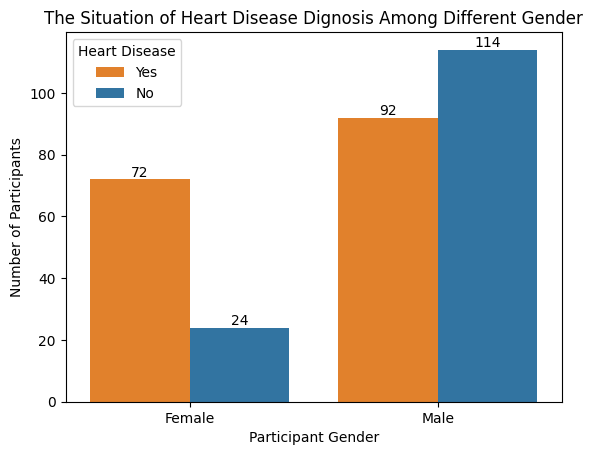

In [11]:
male_count = df['sex'].value_counts()["Male"]
print(f"Number of male participants: {male_count} men")
female_count = df['sex'].value_counts()["Female"]
print(f"Number of female participants: {female_count} women")

palette_colors = {"Yes": "#ff7f0e", "No": "#1f77b4"}  # Yes: Orange; No: Blue
fmc = sns.countplot(data=df, x='sex', hue='target', palette=palette_colors, hue_order=["Yes", "No"])

plt.legend(title="Heart Disease", loc='upper left', labels=["Yes", "No"])  # graph legend

for i in fmc.containers:
    fmc.bar_label(i,)  # clear words labels
    
fmc.set_title('The Situation of Heart Disease Dignosis Among Different Gender')  # title
fmc.set_xlabel('Participant Gender')  # x-axis label
fmc.set_ylabel('Number of Participants')  # y-axis label

plt.savefig("Figure1.png")  # save operation
plt.show()  # show the figure

# Figure 2

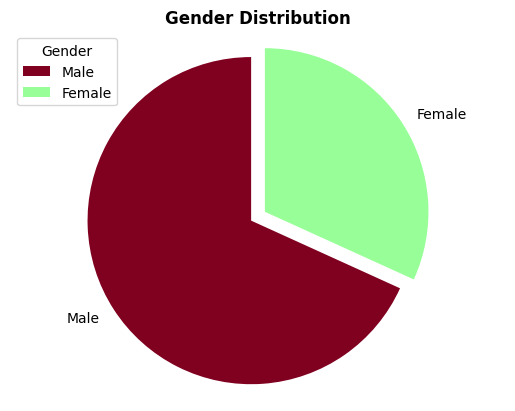

In [12]:
labels = ['Male', 'Female']
sizes = [male_count, female_count]
colors = ['#800020', '#98FF98']  # red; green

fig1, ax1 = plt.subplots()
explode = (0, 0.1)  # colour-blind-friendly
ax1.pie(sizes, explode=explode, labels=labels, shadow=False, colors=colors, startangle=90)

ax1.axis('equal')  # circle
plt.title("Gender Distribution", fontweight="bold")  # title
ax1.legend(labels, title="Gender", loc="upper left")  # legend information

plt.savefig("Figure2.png")  # save operation
plt.show()  # show the figure

# Figure 3

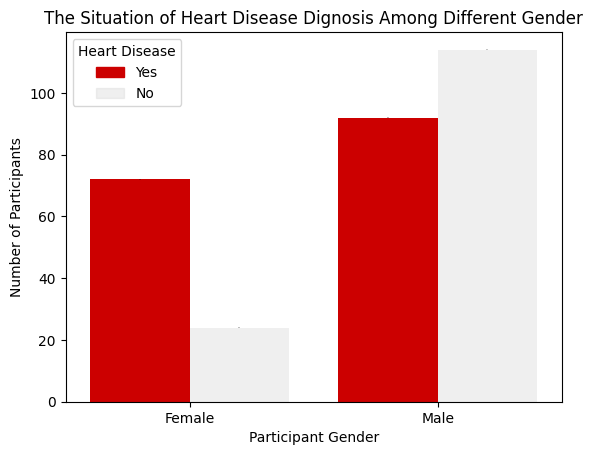

In [13]:
fmc = sns.countplot(data=df, x='sex', hue='target', hue_order=["Yes", "No"])

dark_red = (0.8, 0, 0, 1)  # red without transparency
grey_color = (0.8, 0.8, 0.8, 0.3)  # grey with transparency

for i, container in enumerate(fmc.containers):
    for patch in container.patches:
        patch.set_facecolor(dark_red if i % 2 == 0 else grey_color)  # add RED color for "pillar" on "even number position"

for container in fmc.containers:
    fmc.bar_label(container, label_type='edge', fontsize=0)  # deliberately drop words of the label

# for i in fmc.containers:
#     fmc.bar_label(i,)  # clear words labels

fmc.set_title('The Situation of Heart Disease Dignosis Among Different Gender')  # title
fmc.set_xlabel('Participant Gender')  # x-axis label
fmc.set_ylabel('Number of Participants')  # y-axis label

# new graph legend with correct colours: RED for Yes, GREY for No
ordered_labels = ["Yes", "No"]
ordered_colors = [dark_red if label == 'Yes' else grey_color for label in ordered_labels]
ordered_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(ordered_colors, ordered_labels)]

plt.legend(handles=ordered_handles, title='Heart Disease', loc='upper left', labels=ordered_labels)  # legend information
plt.savefig("Figure3.png")  # save operation
plt.show()  # show the figure

In [14]:
health_data = df[['age', 'sex', 'trestbps', 'chol', 'target']]  # receive only analysis-useful data

In [15]:
health_data.sort_values(by='chol', ascending=False)

,age,sex,trestbps,chol,target
158,67,Female,115,564,Yes
123,65,Female,140,417,Yes
179,56,Female,134,409,No
450,63,Female,150,407,No
255,62,Female,140,394,Yes
...,...,...,...,...,...
10,71,Female,112,149,Yes
81,49,Male,118,149,No
733,44,Female,108,141,Yes
32,57,Male,130,131,No


In [16]:
min_chol = health_data["chol"].min()
print("chol min:", min_chol)

max_chol = health_data["chol"].max()
print("chol max:", max_chol)

chol min: 126
chol max: 564


# Figure 4a

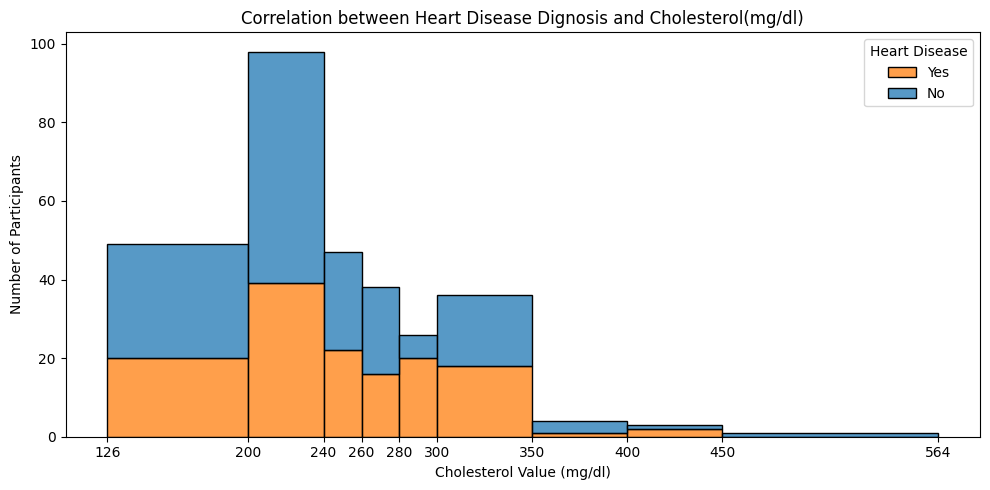

In [17]:
fig, ax1 = plt.subplots(figsize=(10, 5))  

custom_palette = ['#1f77b4', '#ff7f0e']  # blue; orange. Since the Heart Disease Cases were located at the bottom of the chart
bin_edges = [126, 200, 240, 260, 280, 300, 350, 400, 450, 564]  # classes on the x-axis
sns.histplot(data=health_data, x="chol", hue="target", multiple="stack", ax=ax1, palette=custom_palette, hue_order=["Yes", "No"], bins=bin_edges)

ax1.set_title('Correlation between Heart Disease Dignosis and Cholesterol(mg/dl)')  # title
ax1.set_xlabel('Cholesterol Value (mg/dl)')  # x-axis label
ax1.set_ylabel('Number of Participants')  # y-axis label

legend1 = ax1.legend(title="Heart Disease", labels=["Yes", "No"])  # legend information

plt.tight_layout()
plt.xticks([126, 200, 240, 260, 280, 300, 350, 400, 450, 564])  # classes on the x-axis

plt.savefig("Figure4a.png")  # save operation
plt.show()  # show the figure

In [18]:
min_bp = health_data["trestbps"].min()
print("blood pressure min:", min_bp)

max_bp = health_data["trestbps"].max()
print("blood pressure max:", max_bp)

blood pressure min: 94
blood pressure max: 200


# Figure 4b

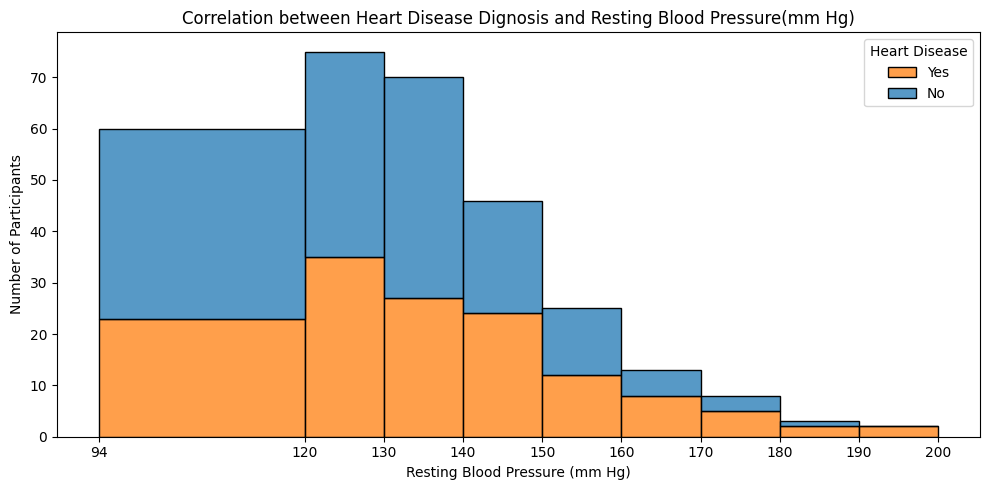

In [19]:
fig, ax2 = plt.subplots(figsize=(10, 5)) 

bin_edges = [94, 120, 130, 140, 150, 160, 170, 180, 190, 200]  # classes on the x-axis
sns.histplot(data=health_data, x="trestbps", hue="target", multiple="stack", ax=ax2, palette=custom_palette, hue_order=["Yes", "No"], bins=bin_edges)

ax2.set_title('Correlation between Heart Disease Dignosis and Resting Blood Pressure(mm Hg)')  # title
ax2.set_xlabel('Resting Blood Pressure (mm Hg)')  # x-axis label
ax2.set_ylabel('Number of Participants')  # y-axis label

legend2 = ax2.legend(title="Heart Disease", labels=["Yes", "No"])  # legend information

plt.tight_layout()
plt.xticks([94, 120, 130, 140, 150, 160, 170, 180, 190, 200])  # classes on the x-axis

plt.savefig("Figure4b.png")  # save operation
plt.show()  # show the figure

In [20]:
min_age = health_data["age"].min()
print("age min:", min_age)

max_age = health_data["age"].max()
print("age max:", max_age)

age min: 29
age max: 77


In [21]:
age = health_data.iloc[:, 0:1]  
age = np.array(age.values.T[0], dtype='int') 

def Q(x, name):
    print("the mean of {} is: {}".format(name, x.mean()))
    print("the median of {} is: {}".format(name, np.median(x)))
    print("the mode of {} is: {}".format(name, np.argmax(np.bincount(x))))
    return
Q(age, 'age')

the mean of age is: 54.420529801324506
the median of age is: 55.5
the mode of age is: 58


In [22]:
chol = df['chol']  # data for "chol" column
chol0 = np.array(chol.values.T, dtype='int') 
print("chol0:",chol0)

chol0: [212 203 174 203 294 248 318 289 249 286 149 341 210 298 204 308 266 244
 211 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271
 263 229 360 258 330 342 226 203 228 278 230 283 241 175 188 217 193 245
 212 232 204 299 212 288 197 315 215 164 326 207 249 177 256 257 255 187
 201 233 149 220 249 268 193 267 209 208 236 303 282 248 197 213 126 309
 186 275 299 281 223 206 197 226 335 218 254 177 295 282 417 260 240 302
 223 192 256 225 325 235 274 197 234 182 204 167 295 172 298 321 283 300
 330 199 564 157 304 222 274 184 354 315 160 247 283 240 199 239 288 246
 409 211 293 180 308 289 309 250 221 234 286 234 260 318 200 227 244 240
 243 266 254 311 236 261 232 242 205 236 258 306 269 261 244 288 245 219
 220 353 198 394 183 231 226 222 237 224 265 211 263 228 207 198 234 192
 204 313 302 340 259 243 270 325 204 227 196 267 294 269 216 264 275 309
 246 276 322 269 250 214 206 273 253 269 199 247 263 201 243 176 204 231
 246 230 229 240 175 284 177 221 303 218 239

In [23]:
age1 = df.loc[df['chol'] > 200]
age1 = age1.iloc[:,0]
print(age1.shape)

(252,)


# Figure 5a

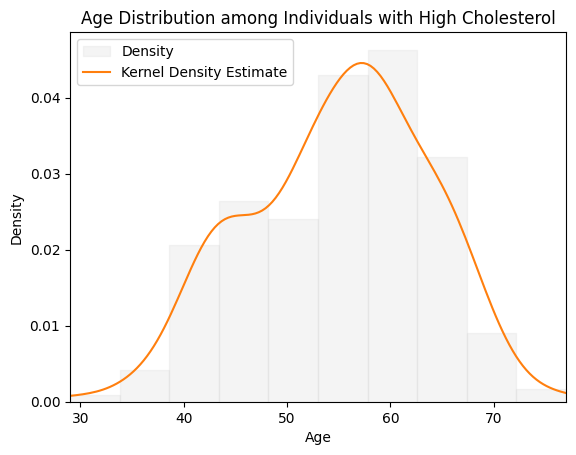

In [24]:
plt.hist(age1, edgecolor=(0.8, 0.8, 0.8, 0.2),density=True, label="Density", facecolor=(0.8, 0.8, 0.8, 0.2))  # grey
sns.kdeplot(age1.tolist(), label="Kernel Density Estimate", color="#ff7f0e")  # orange
plt.legend()  # show the legend
plt.xlim([29, 77])  # x-axis range
plt.title('Age Distribution among Individuals with High Cholesterol')   # title
plt.xlabel('Age')  # x-axis label
plt.ylabel('Density')  # y-axis label

plt.savefig("Figure5a.png")  # save operation

# Figure 5b

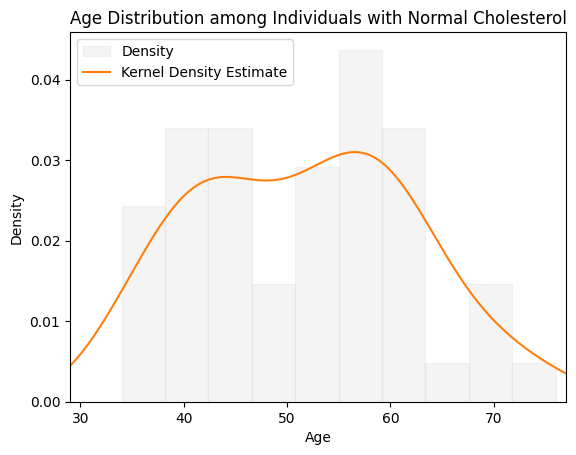

In [25]:
age2 = df.loc[df['chol'] < 200]  # normal value
age2 = age2.iloc[:,0]

plt.hist(age2, edgecolor=(0.8, 0.8, 0.8, 0.2),density=True, label="Density", facecolor=(0.8, 0.8, 0.8, 0.2))  # grey
sns.kdeplot(age2.tolist(), label="Kernel Density Estimate", color="#ff7f0e")  # orange
plt.legend()  # show the legend
plt.xlim([29, 77])  # x-axis range
plt.title('Age Distribution among Individuals with Normal Cholesterol')  # title
plt.xlabel('Age')  # x-axis label
plt.ylabel('Density')  # y-axis label

plt.savefig("Figure5b.png")  # save operation

In [26]:
data=pd.read_csv("data.csv")  # import data again
data.drop_duplicates(inplace=True)  # drop duplicate data as uncertainty

In [27]:
# a1 = LinearRegression()  # model
# a2 = data[["age"]]
# a3 = data[["chol"]]
# a1.fit(a2, a3)  # training
# a4 = a1.predict(a2)  # linear regression

# plt.scatter(a2, a3)
# plt.title('age and chol')  
# plt.xlabel('age')
# plt.ylabel('chol')  
# plt.plot(a2, a4, c = 'r')

# plt.savefig("Figure-x.png")
# plt.show()

# Figure 6

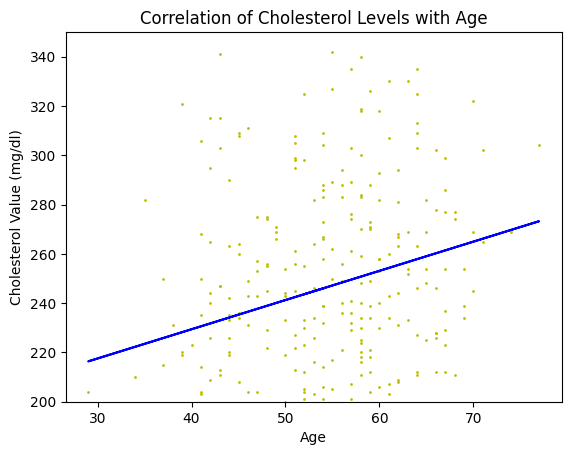

In [28]:
a1 = LinearRegression()  # model
a2 = data[["age"]]
a3 = data[["chol"]]
a1.fit(a2, a3)  # training
a4 = a1.predict(a2)  # linear regression

plt.scatter(a2, a3, s=1, c='y')  # small dot, yellow dot
plt.title('Correlation of Cholesterol Levels with Age')  
plt.xlabel('Age')  # x-axis label
plt.ylabel('Cholesterol Value (mg/dl)')  # y-axis label
plt.plot(a2, a4, c = 'b')  # blue line
plt.ylim(200, 350)  # y-axis range

plt.savefig("Figure6.png")  # save operation
plt.show()  # show the figure